In [1]:
#Packages 
import numpy as np
import xgcm
from xgcm import Grid
import xarray as xr
import xroms
from datetime import datetime

import glob
from xhistogram.xarray import histogram
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean.cm as cmo
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.ticker as tick
from matplotlib.dates import DateFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates
import pandas as pd

#Dask
from dask.distributed import Client

client = Client()
client

#Cartopy
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                edgecolor='face',
                                facecolor=cfeature.COLORS['land'])

states_provinces = cfeature.NaturalEarthFeature(
                   category='cultural',
                   name='admin_1_states_provinces_lines',
                   scale='10m',
                   facecolor='none')

/d2/home/dylan/.conda/envs/copano/lib/python3.9/site-packages/distributed/node.py:180: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39445 instead
  warnings.warn(


In [2]:
paths = glob.glob('/d1/shared/TXLA_ROMS/numerical_mixing/non-nest/ver0/ocean_his_0000*.nc')
ds_parent = xroms.open_mfnetcdf(paths, chunks = {'ocean_time':1})
ds_parent, grid_parent = xroms.roms_dataset(ds_parent, Vtransform = 2)

paths = glob.glob('/d1/shared/TXLA_ROMS/numerical_mixing/nest/ver1/ocean_avg_child_00*.nc')
ds_child = xroms.open_mfnetcdf(paths, chunks = {'ocean_time':1})
ds_child, grid_child = xroms.roms_dataset(ds_child, Vtransform = 2)

In [3]:
sgradmag_parent = []
sgradmag_child = []
sgradmag_bins = []
for d in range(478):
    #Salinity gradient magnitude 
    path = '/d2/home/dylan/JAMES/histogram_outputs/surface_widerbins/sgradmag_parent_final_' + str(d) + '.nc'
    sgradmag_parent.append(xr.open_dataset(path).sgradmag_histogram.values)
    
    path = '/d2/home/dylan/JAMES/histogram_outputs/surface_widerbins/sgradmag_child_final_' + str(d) + '.nc'
    sgradmag_child.append(xr.open_dataset(path).sgradmag_histogram.values)

sgradmag_bins = xr.open_dataset(path).sgradmag_bin.values

sgradmag_parent_hist = np.array(sgradmag_parent).sum(axis = 0)
dsgradmag = sgradmag_bins[1]-sgradmag_bins[0]
sgradmag_parent_pdf = sgradmag_parent_hist/(dsgradmag*sgradmag_parent_hist.sum())
sgradmag_parent_cdf = (sgradmag_parent_pdf.cumsum()*dsgradmag)

sgradmag_child_hist = np.array(sgradmag_child).sum(axis = 0)
sgradmag_child_pdf = sgradmag_child_hist/(dsgradmag*sgradmag_child_hist.sum())
sgradmag_child_cdf = (sgradmag_child_pdf.cumsum()*dsgradmag)

zeta_parent = []
zeta_child = []
zeta_bins = []
for d in range(478):
    #Relative vorticity
    path = '/d2/home/dylan/JAMES/histogram_outputs/surface_widerbins/rvort_parent_final_'+str(d)+'.nc'
    zeta_parent.append(xr.open_dataset(path).rel_vort_histogram.values)
    
    path = '/d2/home/dylan/JAMES/histogram_outputs/surface_widerbins/rvort_child_final_'+str(d)+'.nc'
    zeta_child.append(xr.open_dataset(path).rel_vort_histogram.values)

zeta_bins = xr.open_dataset(path).rvort_bin.values

zeta_parent_hist = np.array(zeta_parent).sum(axis = 0)
dzeta = zeta_bins[1]-zeta_bins[0]
zeta_parent_pdf = zeta_parent_hist/(dzeta*zeta_parent_hist.sum())
zeta_parent_cdf = (zeta_parent_pdf.cumsum()*dzeta)

zeta_child_hist = np.array(zeta_child).sum(axis = 0)
zeta_child_pdf = zeta_child_hist/(dzeta*zeta_child_hist.sum())
zeta_child_cdf = (zeta_child_pdf.cumsum()*dzeta)

div_parent = []
div_child = []
div_bins = []

for d in range(478):
    #Divergence
    path = '/d2/home/dylan/JAMES/histogram_outputs/surface_widerbins/div_parent_final_'+str(d)+'.nc'
    div_parent.append(xr.open_dataset(path).div_histogram.values)
    
    path = '/d2/home/dylan/JAMES/histogram_outputs/surface_widerbins/div_child_final_'+str(d)+'.nc'
    div_child.append(xr.open_dataset(path).div_histogram.values)

div_bins = xr.open_dataset(path).divergence_bin.values

div_parent_hist = np.array(div_parent).sum(axis = 0)
ddiv = div_bins[1]-div_bins[0]
div_parent_pdf = div_parent_hist/(ddiv*div_parent_hist.sum())
div_parent_cdf = (div_parent_pdf.cumsum()*ddiv)

div_child_hist = np.array(div_child).sum(axis = 0)
div_child_pdf = div_child_hist/(ddiv*div_child_hist.sum())
div_child_cdf = (div_child_pdf.cumsum()*ddiv)

strain_parent = []
strain_child = []
strain_bins = []
for d in range(478):
    #Strain
    path = '/d2/home/dylan/JAMES/histogram_outputs/surface_widerbins/strain_parent_final_'+str(d)+'.nc'
    strain_parent.append(xr.open_dataset(path).strain_histogram.values)
    
    path = '/d2/home/dylan/JAMES/histogram_outputs/surface_widerbins/strain_child_final_'+str(d)+'.nc'
    strain_child.append(xr.open_dataset(path).strain_histogram.values)

strain_bins = xr.open_dataset(path).strain_bin.values

strain_parent_hist = np.array(strain_parent).sum(axis = 0)
dstrain = strain_bins[1]-strain_bins[0]
strain_parent_pdf = strain_parent_hist/(dstrain*strain_parent_hist.sum())
strain_parent_cdf = (strain_parent_pdf.cumsum()*dstrain)

strain_child_hist = np.array(strain_child).sum(axis = 0)
strain_child_pdf = strain_child_hist/(dstrain*strain_child_hist.sum())
strain_child_cdf = (strain_child_pdf.cumsum()*dstrain)

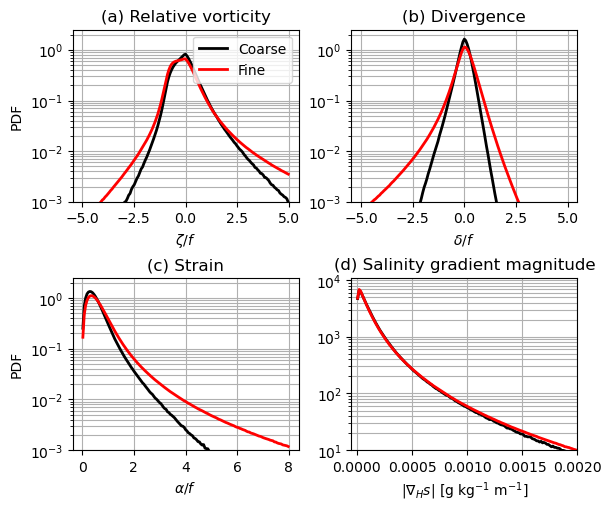

In [4]:
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(2,2, figsize = (6,5), dpi = 100, constrained_layout = True)

ax[0,0].semilogy(zeta_bins, zeta_parent_pdf, lw = 2, color = 'k', label = 'Coarse')
ax[0,0].semilogy(zeta_bins, zeta_child_pdf, lw = 2, color = 'r', label = 'Fine')
ax[0,0].set_title('(a) Relative vorticity')
ax[0,0].set_ylabel('PDF')
ax[0,0].set_xlabel('$\zeta/f$')
# ax[0,0].set_xlim(-5,5)
# ax[0,0].set_xticks([-3,-2,-1,0,1,2,3])
ax[0,0].set_ylim(10**-3, 2.5)

ax[0,1].semilogy(div_bins, div_parent_pdf, lw = 2, color = 'k')
ax[0,1].semilogy(div_bins, div_child_pdf, lw = 2, color = 'r')
ax[0,1].set_title('(b) Divergence')
ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('$\delta/f$')
ax[0,1].set_ylim(10**-3, 2.5)
# ax[0,1].set_yticklabels([])
# ax[0,1].set_xlim(-5,5)
# ax[0,1].set_xticks([-3, -2, -1, 0, 1, 2, 3])

ax[1,0].semilogy(strain_bins, strain_parent_pdf, lw = 2, color = 'k')
ax[1,0].semilogy(strain_bins, strain_child_pdf, lw = 2, color = 'r')
ax[1,0].set_title('(c) Strain')
ax[1,0].set_ylabel('PDF')
ax[1,0].set_xlabel(r'$\alpha/f$')
# ax[1,0].set_xticks([0, 1, 2, 3, 4, 5, 6])
# ax[1,0].set_ylim(10**-3.5, 2)
ax[1,0].set_ylim(10**-3, 2.5)

ax[1,1].semilogy(sgradmag_bins, sgradmag_parent_pdf, lw = 2, color = 'k', label = 'Parent')
ax[1,1].semilogy(sgradmag_bins, sgradmag_child_pdf, lw = 2, color = 'r', label = 'Child')
ax[1,1].set_ylabel('')

ax[1,1].set_title('(d) Salinity gradient magnitude')
ax[1,1].set_xlabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')
ax[1,1].set_ylim(10, 11000)
ax[1,1].set_xlim(-.00005, 0.002)
# ax[1,1].set_xticks([0, 0.0005, 0.001, 0.0015])

ax[0,0].legend()

for i in range(2):
    for j in range(2):
        ax[i,j].grid()
        ax[i,j].yaxis.grid(True, which='minor')
# ax[1,1].yaxis.grid(True, which='minor')
# plt.savefig('/d2/home/dylan/JAMES/figures/draft1/surface_pdfs.jpg', dpi = 300, bbox_inches='tight')

# Repeat but for the entire water column 

In [5]:
sgradmag_parent = []
sgradmag_child = []
sgradmag_bins = []
for d in range(240):
    #Salinity gradient magnitude 
    path = '/d2/home/dylan/JAMES/histogram_outputs/whole/sgradmag_rho_whole_parent_2010_final_' + str(d) + '.nc'
    sgradmag_parent.append(xr.open_dataset(path).sgradmag.values)
    
    path = '/d2/home/dylan/JAMES/histogram_outputs/whole/sgradmag_rho_whole_child_2010_final_' + str(d) + '.nc'
    sgradmag_child.append(xr.open_dataset(path).sgradmag.values)

sgradmag_bins = xr.open_dataset(path).sgradmag_bin.values

sgradmag_parent_hist = np.array(sgradmag_parent).sum(axis = 0)
dsgradmag = sgradmag_bins[1]-sgradmag_bins[0]
sgradmag_parent_pdf = sgradmag_parent_hist/(dsgradmag*sgradmag_parent_hist.sum())
sgradmag_parent_cdf = (sgradmag_parent_pdf.cumsum()*dsgradmag)

sgradmag_child_hist = np.array(sgradmag_child).sum(axis = 0)
sgradmag_child_pdf = sgradmag_child_hist/(dsgradmag*sgradmag_child_hist.sum())
sgradmag_child_cdf = (sgradmag_child_pdf.cumsum()*dsgradmag)

zeta_parent = []
zeta_child = []
zeta_bins = []
for d in range(240):
    #Relative vorticity
    path = '/d2/home/dylan/JAMES/histogram_outputs/whole/rvort_whole_parent_2010_final_'+str(d)+'.nc'
    zeta_parent.append(xr.open_dataset(path).rvort.values)
    
    path = '/d2/home/dylan/JAMES/histogram_outputs/whole/rvort_whole_child_2010_final_'+str(d)+'.nc'
    zeta_child.append(xr.open_dataset(path).rvort.values)

zeta_bins = xr.open_dataset(path).rvort_bin.values

zeta_parent_hist = np.array(zeta_parent).sum(axis = 0)
dzeta = zeta_bins[1]-zeta_bins[0]
zeta_parent_pdf = zeta_parent_hist/(dzeta*zeta_parent_hist.sum())
zeta_parent_cdf = (zeta_parent_pdf.cumsum()*dzeta)

zeta_child_hist = np.array(zeta_child).sum(axis = 0)
zeta_child_pdf = zeta_child_hist/(dzeta*zeta_child_hist.sum())
zeta_child_cdf = (zeta_child_pdf.cumsum()*dzeta)

div_parent = []
div_child = []
div_bins = []

for d in range(240):
    #Divergence
    path = '/d2/home/dylan/JAMES/histogram_outputs/whole/divergence_whole_parent_2010_final_'+str(d)+'.nc'
    div_parent.append(xr.open_dataset(path).div.values)
    
    path = '/d2/home/dylan/JAMES/histogram_outputs/whole/divergence_whole_child_2010_final_'+str(d)+'.nc'
    div_child.append(xr.open_dataset(path).div.values)

div_bins = xr.open_dataset(path).divergence_bin.values

div_parent_hist = np.array(div_parent).sum(axis = 0)
ddiv = div_bins[1]-div_bins[0]
div_parent_pdf = div_parent_hist/(ddiv*div_parent_hist.sum())
div_parent_cdf = (div_parent_pdf.cumsum()*ddiv)

div_child_hist = np.array(div_child).sum(axis = 0)
div_child_pdf = div_child_hist/(ddiv*div_child_hist.sum())
div_child_cdf = (div_child_pdf.cumsum()*ddiv)

strain_parent = []
strain_child = []
strain_bins = []
for d in range(240):
    #Strain
    path = '/d2/home/dylan/JAMES/histogram_outputs/whole/strain_whole_parent_2010_final_'+str(d)+'.nc'
    strain_parent.append(xr.open_dataset(path).strain.values)
    
    path = '/d2/home/dylan/JAMES/histogram_outputs/whole/strain_whole_child_2010_final_'+str(d)+'.nc'
    strain_child.append(xr.open_dataset(path).strain.values)

strain_bins = xr.open_dataset(path).strain_bin.values

strain_parent_hist = np.array(strain_parent).sum(axis = 0)
dstrain = strain_bins[1]-strain_bins[0]
strain_parent_pdf = strain_parent_hist/(dstrain*strain_parent_hist.sum())
strain_parent_cdf = (strain_parent_pdf.cumsum()*dstrain)

strain_child_hist = np.array(strain_child).sum(axis = 0)
strain_child_pdf = strain_child_hist/(dstrain*strain_child_hist.sum())
strain_child_cdf = (strain_child_pdf.cumsum()*dstrain)

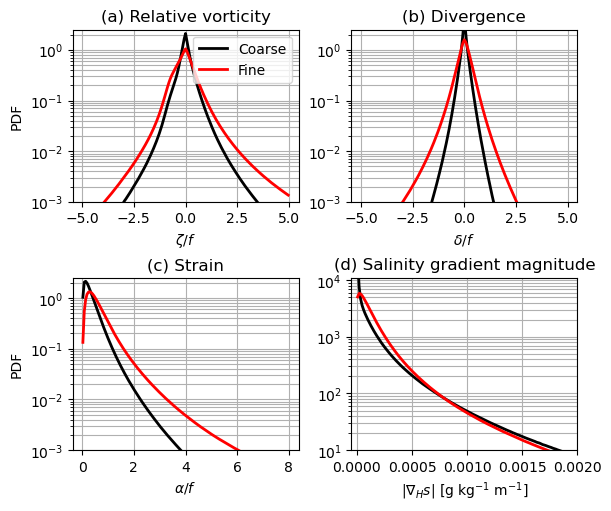

In [6]:
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(2,2, figsize = (6,5), dpi = 100, constrained_layout = True)

ax[0,0].semilogy(zeta_bins, zeta_parent_pdf, lw = 2, color = 'k', label = 'Coarse')
ax[0,0].semilogy(zeta_bins, zeta_child_pdf, lw = 2, color = 'r', label = 'Fine')
ax[0,0].set_title('(a) Relative vorticity')
ax[0,0].set_ylabel('PDF')
ax[0,0].set_xlabel('$\zeta/f$')
# ax[0,0].set_xlim(-5,5)
# ax[0,0].set_xticks([-3,-2,-1,0,1,2,3])
ax[0,0].set_ylim(10**-3, 2.5)

ax[0,1].semilogy(div_bins, div_parent_pdf, lw = 2, color = 'k')
ax[0,1].semilogy(div_bins, div_child_pdf, lw = 2, color = 'r')
ax[0,1].set_title('(b) Divergence')
ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('$\delta/f$')
ax[0,1].set_ylim(10**-3, 2.5)
# ax[0,1].set_yticklabels([])
# ax[0,1].set_xlim(-5,5)
# ax[0,1].set_xticks([-3, -2, -1, 0, 1, 2, 3])

ax[1,0].semilogy(strain_bins, strain_parent_pdf, lw = 2, color = 'k')
ax[1,0].semilogy(strain_bins, strain_child_pdf, lw = 2, color = 'r')
ax[1,0].set_title('(c) Strain')
ax[1,0].set_ylabel('PDF')
ax[1,0].set_xlabel(r'$\alpha/f$')
# ax[1,0].set_xticks([0, 1, 2, 3, 4, 5, 6])
# ax[1,0].set_ylim(10**-3.5, 2)
ax[1,0].set_ylim(10**-3, 2.5)

ax[1,1].semilogy(sgradmag_bins, sgradmag_parent_pdf, lw = 2, color = 'k', label = 'Parent')
ax[1,1].semilogy(sgradmag_bins, sgradmag_child_pdf, lw = 2, color = 'r', label = 'Child')
ax[1,1].set_ylabel('')

ax[1,1].set_title('(d) Salinity gradient magnitude')
ax[1,1].set_xlabel(r'$|\nabla_H s|$ [g kg$^{-1}$ m$^{-1}$]')
ax[1,1].set_ylim(10, 11000)
ax[1,1].set_xlim(-.00005, 0.002)
# ax[1,1].set_xticks([0, 0.0005, 0.001, 0.0015])

ax[0,0].legend()

for i in range(2):
    for j in range(2):
        ax[i,j].grid()
        ax[i,j].yaxis.grid(True, which='minor')
# ax[1,1].yaxis.grid(True, which='minor')
# plt.savefig('/d2/home/dylan/JAMES/figures/draft1/whole_pdfs.jpg', dpi = 300, bbox_inches='tight')

# Examine statistics for the surface and entire water column 

In [7]:
def pearson_skewness(mean, median, std):
    skew = (3*(mean-median))/std
    return skew

divmeanparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_parent_mean.npy')
divmedparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_parent_median.npy')
divstdparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_parent_std.npy')
divskewparent = pearson_skewness(divmeanparent, divmedparent, divstdparent)

divmeanchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_child_mean.npy')
divmedchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_child_median.npy')
divstdchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/divergence_surface_child_std.npy')
divskewchild = pearson_skewness(divmeanchild, divmedchild, divstdchild)

divmeanparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_parent_mean.npy')
divmedparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_parent_median.npy')
divstdparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_parent_std.npy')
divskewparentwhole = pearson_skewness(divmeanparentwhole, divmedparentwhole, divstdparentwhole)

divmeanchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_child_mean.npy')
divmedchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_child_median.npy')
divstdchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/divergence_whole_subset_child_std.npy')
divskewchildwhole = pearson_skewness(divmeanchildwhole, divmedchildwhole, divstdchildwhole)

rvortmeanparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_parent_mean.npy')
rvortmedparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_parent_median.npy')
rvortstdparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_parent_std.npy')
rvortskewparent = pearson_skewness(rvortmeanparent, rvortmedparent, rvortstdparent)

rvortmeanchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_child_mean.npy')
rvortmedchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_child_median.npy')
rvortstdchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/relvort_surface_child_std.npy')
rvortskewchild = pearson_skewness(rvortmeanchild, rvortmedchild, rvortstdchild)

rvortmeanparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_parent_mean.npy')
rvortmedparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_parent_median.npy')
rvortstdparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_parent_std.npy')
rvortskewparentwhole = pearson_skewness(rvortmeanparentwhole, rvortmedparentwhole, rvortstdparentwhole)

rvortmeanchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_child_mean.npy')
rvortmedchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_child_median.npy')
rvortstdchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/relvort_whole_subset_child_std.npy')
rvortskewchildwhole = pearson_skewness(rvortmeanchildwhole, rvortmedchildwhole, rvortstdchildwhole)

strainmeanparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_parent_mean.npy')
strainmedparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_parent_median.npy')
strainstdparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_parent_std.npy')
strainskewparent = pearson_skewness(strainmeanparent, strainmedparent, strainstdparent)

strainmeanchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_child_mean.npy')
strainmedchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_child_median.npy')
strainstdchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/strain_surface_child_std.npy')
strainskewchild = pearson_skewness(strainmeanchild, strainmedchild, strainstdchild)

strainmeanparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_parent_mean.npy')
strainmedparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_parent_median.npy')
strainstdparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_parent_parent_std.npy')
strainskewparentwhole = pearson_skewness(strainmeanparentwhole, strainmedparentwhole, strainstdparentwhole)

strainmeanchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_child_mean.npy')
strainmedchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_child_median.npy')
strainstdchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/strain_whole_subset_child_std.npy')
strainskewchildwhole = pearson_skewness(strainmeanchildwhole, strainmedchildwhole, strainstdchildwhole)

sgradmagmeanparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_parent_mean.npy')
sgradmagmedparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_parent_median.npy')
sgradmagstdparent = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_parent_std.npy')
sgradmagskewparent = pearson_skewness(sgradmagmeanparent, sgradmagmedparent, sgradmagstdparent)

sgradmagmeanchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_child_mean.npy')
sgradmagmedchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_child_median.npy')
sgradmagstdchild = np.load('/d2/home/dylan/JAMES/histogram_outputs/surface/stats/sgradmag_surface_child_std.npy')
sgradmagskewchild = pearson_skewness(sgradmagmeanchild, sgradmagmedchild, sgradmagstdchild)

sgradmagmeanparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_parent_mean.npy')
sgradmagmedparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_parent_median.npy')
sgradmagstdparentwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_parent_std.npy')
sgradmagskewparentwhole = pearson_skewness(sgradmagmeanparentwhole, sgradmagmedparentwhole, sgradmagstdparentwhole)

sgradmagmeanchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_child_mean.npy')
sgradmagmedchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_child_median.npy')
sgradmagstdchildwhole = np.load('/d2/home/dylan/JAMES/histogram_outputs/whole/stats/sgradmag_whole_subset_child_std.npy')
sgradmagskewchildwhole = pearson_skewness(sgradmagmeanchildwhole, sgradmagmedchildwhole, sgradmagstdchildwhole)

In [8]:
# print('div: surface med', divmedparent)
# print('div: surface std', divstdparent)
# print('div: child surface med', divmedchild)
# print('div: child surface std', divstdchild)
# print('div: whole med', divmedparentwhole)
# print('div: whole std', divstdparentwhole)
# print('div: child whole med', divmedchildwhole)
# print('div: child whole std', divstdchildwhole)
# print('div skew: parent', divskewparent)
# print('div skew: child', divskewchild)
# print('divwhole skew: parent', divskewparentwhole)
# print('divwhole skew: child', divskewchildwhole)

# print('rvort: surface med', rvortmedparent)
# print('rvort: surface std', rvortstdparent)
# print('rvort: child surface med', rvortmedchild)
# print('rvort: child surface std', rvortstdchild)
# print('rvort: whole med', rvortmedparentwhole)
# print('rvort: whole std', rvortstdparentwhole)
# print('rvort: child whole med', rvortmedchildwhole)
# print('rvort: child whole std', rvortstdchildwhole)
# print('rvort skew: parent', rvortskewparent)
# print('rvort skew: child', rvortskewchild)
# print('rvortwhole skew: parent', rvortskewparentwhole)
# print('rvortwhole skew: child', rvortskewchildwhole)

# print('strain: surface med', strainmedparent)
# print('strain: surface std', strainstdparent)
# print('strain: child surface med', strainmedchild)
# print('strain: child surface std', strainstdchild)
# print('strain: whole med', strainmedparentwhole)
# print('strain: whole std', strainstdparentwhole)
# print('strain: child whole med', strainmedchildwhole)
# print('strain: child whole std', strainstdchildwhole)
# print('strain skew: parent', strainskewparent)
# print('strain skew: child', strainskewchild)
# print('strainwhole skew: parent', strainskewparentwhole)
# print('strainwhole skew: child', strainskewchildwhole)

print('sgradmag: surface med', sgradmagmedparent*1e4)
print('sgradmag: surface std', sgradmagstdparent*1e4)
print('sgradmag: child surface med', sgradmagmedchild*1e4)
print('sgradmag: child surface std', sgradmagstdchild*1e4)
print('sgradmag: whole med', sgradmagmedparentwhole*1e4)
print('sgradmag: whole std', sgradmagstdparentwhole*1e4)
print('sgradmag: child whole med', sgradmagmedchildwhole*1e4)
print('sgradmag: child whole std', sgradmagstdchildwhole*1e4)
print('sgradmag: skew parent', sgradmagskewparent)
print('sgradmag: skew child', sgradmagskewchild)
print('sgradmagwhole: skew parent', sgradmagskewparentwhole)
print('sgradmagwhole: skew child', sgradmagskewchildwhole)

sgradmag: surface med 0.9999249985177111
sgradmag: surface std 3.4272606653090825
sgradmag: child surface med 0.9889474678207149
sgradmag: child surface std 4.67355510311427
sgradmag: whole med 0.9046475792202329
sgradmag: whole std 2.5167744382332073
sgradmag: child whole med 1.022077021950749
sgradmag: child whole std 3.248523266497904
sgradmag: skew parent 0.9260639098434826
sgradmag: skew child 0.8050999717412475
sgradmagwhole: skew parent 0.884166852645517
sgradmagwhole: skew child 0.8392517191655984


In [9]:
def per_change(final, initial):
    perchange = 100*((final-initial)/np.abs(initial))
    return perchange

rvort_surface_pchange = per_change(rvortmedchild, rvortmedparent)
rvort_whole_pchange = per_change(rvortmedchildwhole, rvortmedparentwhole)

div_surface_pchange = per_change(divmedchild, divmedparent)
div_whole_pchange = per_change(divmedchildwhole, divmedparentwhole)

strain_surface_pchange = per_change(strainmedchild, strainmedparent)
strain_whole_pchange = per_change(strainmedchildwhole, strainmedparentwhole)

sgradmag_surface_pchange = per_change(sgradmagmedchild, sgradmagmedparent)
sgradmag_whole_pchange = per_change(sgradmagmedchildwhole, sgradmagmedparentwhole)

print(rvort_surface_pchange)
print(rvort_whole_pchange)
print(div_surface_pchange)
print(div_whole_pchange)
print(strain_surface_pchange)
print(strain_whole_pchange)
print(sgradmag_surface_pchange)
print(sgradmag_whole_pchange)

-159.93508112395207
-1163.4594459064117
265.5660571384785
286.462341531755
22.721138227855292
22.53954018532266
-1.0978354089826063
12.980683906956914


In [11]:
print(per_change(rvortskewchild, rvortskewparent))
print(per_change(divskewchild, divskewparent))

31.497189635157397
-34.12884103901482
